In [9]:
from rectify import rectify_imgs, make_disparity_map
import cv2
from random import random
from matplotlib import pyplot as plt

In [10]:
INPUT_DIR = '../data/stereo_images/TEST'
CALIBRATION_DIR = '../data/stereo_images/scenes/calibration_results'
BASELINE = 0.06
DISTANCE_FACTOR = BASELINE * 5/8 # (25 / 39)

Processing ../data/stereo_images/TEST/raw/6.png


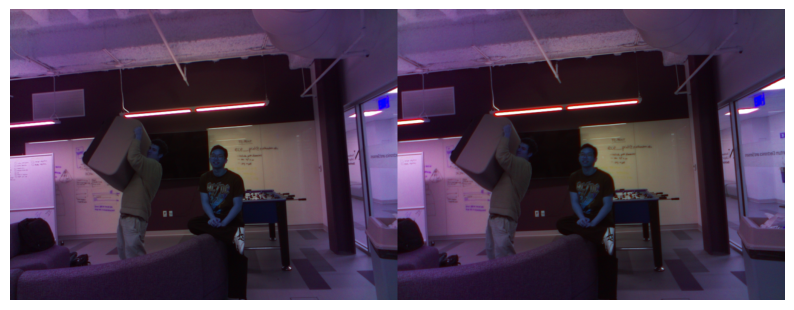

In [11]:
file_num = int(random() * 10) + 1
selected_file = f'{INPUT_DIR}/raw/{file_num}.png'
print(f'Processing {selected_file}')
image = cv2.imread(selected_file)

plt.imshow(image)
plt.axis('off')  # Hide axes
plt.gcf().set_size_inches(10, 10)  # Set the figure size to make the image larger
plt.show()

In [12]:
left = cv2.imread(f'{INPUT_DIR}/left/{file_num}.png')
right = cv2.imread(f'{INPUT_DIR}/right/{file_num}.png')

In [13]:
if left is not None and right is not None:
	left_rectified, right_rectified, Q, focal_length = rectify_imgs(left, right, CALIBRATION_DIR)
else:
	print("Error: One or both of the images are not loaded correctly.")

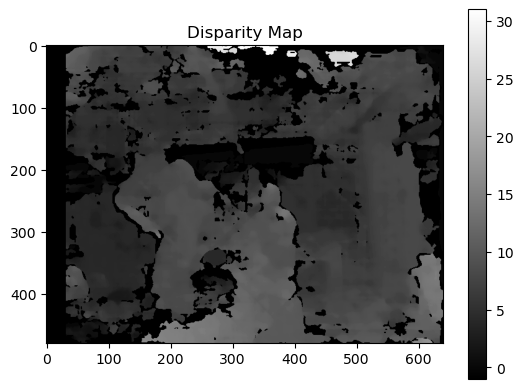

In [14]:
min_disp = 0
num_disp = 16 * 2
block_size = 10
disparity_map = make_disparity_map(left_rectified, right_rectified, min_disp, num_disp, block_size)

# Display disparity map
plt.imshow(disparity_map, 'gray')
plt.title("Disparity Map")
plt.colorbar()
plt.show()


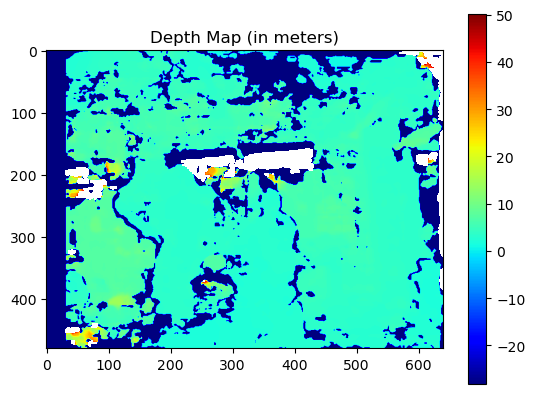

In [ ]:

# Step 4: Convert Disparity Map to Depth Map
depth_map = cv2.reprojectImageTo3D(disparity_map, Q)
distances = depth_map[:, :, 2] * DISTANCE_FACTOR

# Display the Depth Map
fig, ax = plt.subplots()
depth_display = ax.imshow(distances, 'jet')  # Z values represent the depth
plt.colorbar(depth_display)
plt.title("Depth Map (in meters)")
plt.show()


In [17]:
# Print distance of a certain pixel
pixel = distances[200 ,205]
print(f'Distance of the center pixel: {pixel} meters')

Distance of the center pixel: 3.5182383060455322 meters
